In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
from time import time
import mediapipe as mp
import cv2 as cv

In [ ]:
mpPose = mp.solutions.pose

In [ ]:
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

In [ ]:
mpDraw = mp.solutions.drawing_utils

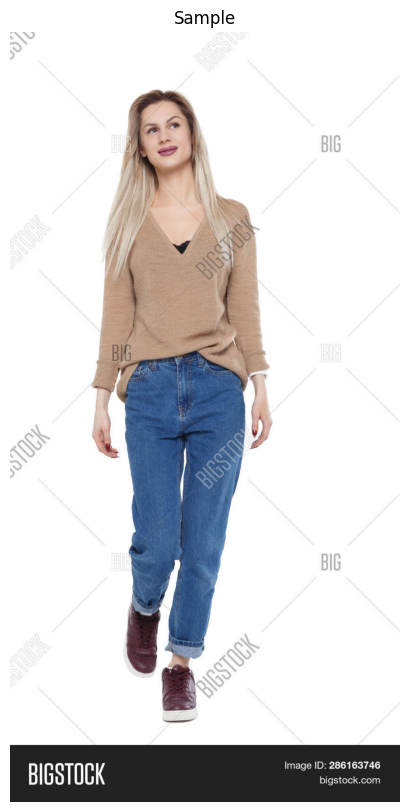

In [ ]:
image = cv.imread('/content/drive/MyDrive/final_straight.jpg')
plt.figure(figsize=[10, 10])
plt.title('Sample')
plt.axis('off')
plt.imshow(image[:, :, ::-1])
plt.show()

In [ ]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.39743635058403015
y: 0.13964638113975525
z: -1.1264334917068481
visibility: 0.9999414682388306

LEFT_EYE_INNER
x: 0.41080132126808167
y: 0.12224337458610535
z: -1.0615609884262085
visibility: 0.9998952150344849



In [ ]:
imgHeight, imgWidth, _ = image.shape

In [ ]:
if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].x * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].y * imgHeight)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].z * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].visibility)

NOSE
325.8978074789047
226.2271374464035
-923.6754631996155
0.9999414682388306
LEFT_EYE_INNER
336.85708343982697
198.03426682949066
-870.480010509491
0.9998952150344849


In [ ]:
imgCopy = image.copy()

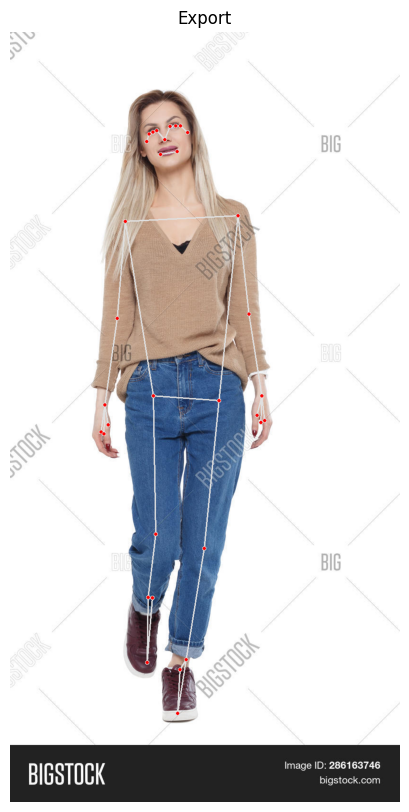

In [ ]:
if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imgCopy,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imgCopy[:, :, ::-1])
    plt.show()

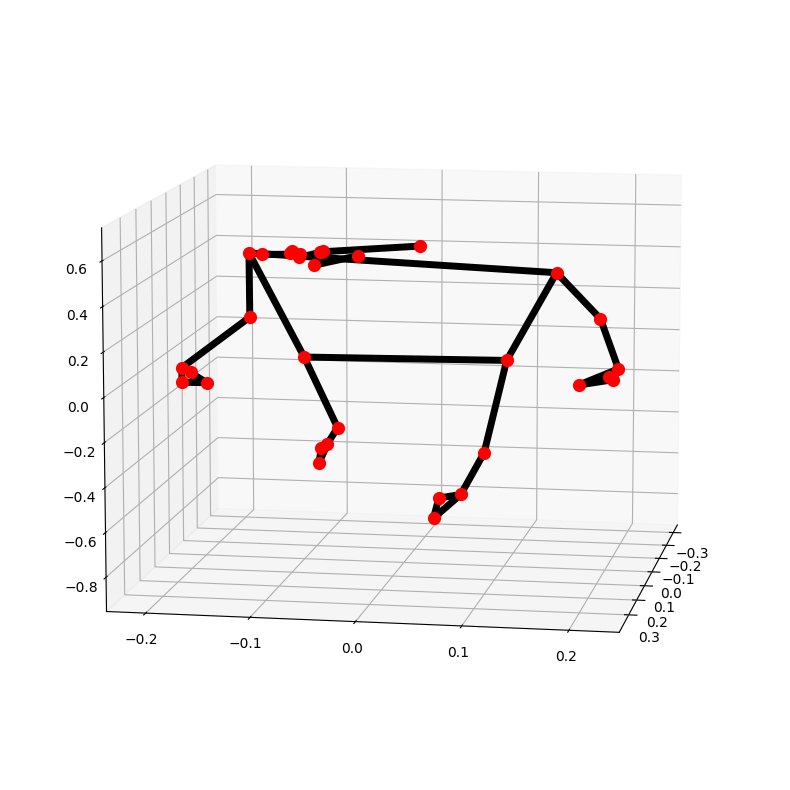

In [ ]:
mpDraw.plot_landmarks(
    result.pose_world_landmarks,
    mpPose.POSE_CONNECTIONS
)

In [ ]:
def detectPose(image, pose, display=True):
    OutputImage = image.copy()
    imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    imgHeight, imgWidth, _ = image.shape
    landmarks = []

    if results.pose_landmarks:
        mpDraw.draw_landmarks(
            image=OutputImage,
            landmark_list=results.pose_landmarks,
            connections=mpPose.POSE_CONNECTIONS
        )
        for landmark in results.pose_landmarks.landmark:
            landmarks.append(
                (int(landmark.x * imgWidth),
                 int(landmark.y * imgHeight),
                 int(landmark.z * imgWidth))
            )
    if display:
        plt.figure(figsize=[22, 22])

        plt.subplot(211)
        plt.title('Original')
        plt.axis('off')
        plt.imshow(image[:, :, ::-1])

        plt.subplot(212)
        plt.title('Output')
        plt.axis('off')
        plt.imshow(OutputImage[:, :, ::-1])

        mpDraw.plot_landmarks(results.pose_world_landmarks, mpPose.POSE_CONNECTIONS)

    else:
        return OutputImage, landmarks

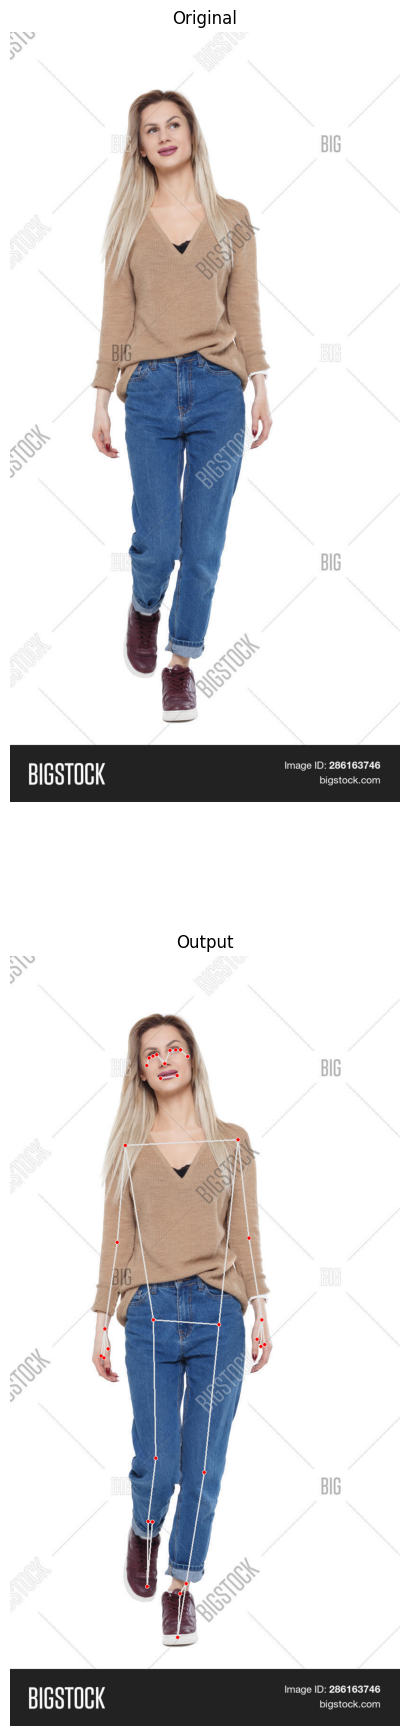

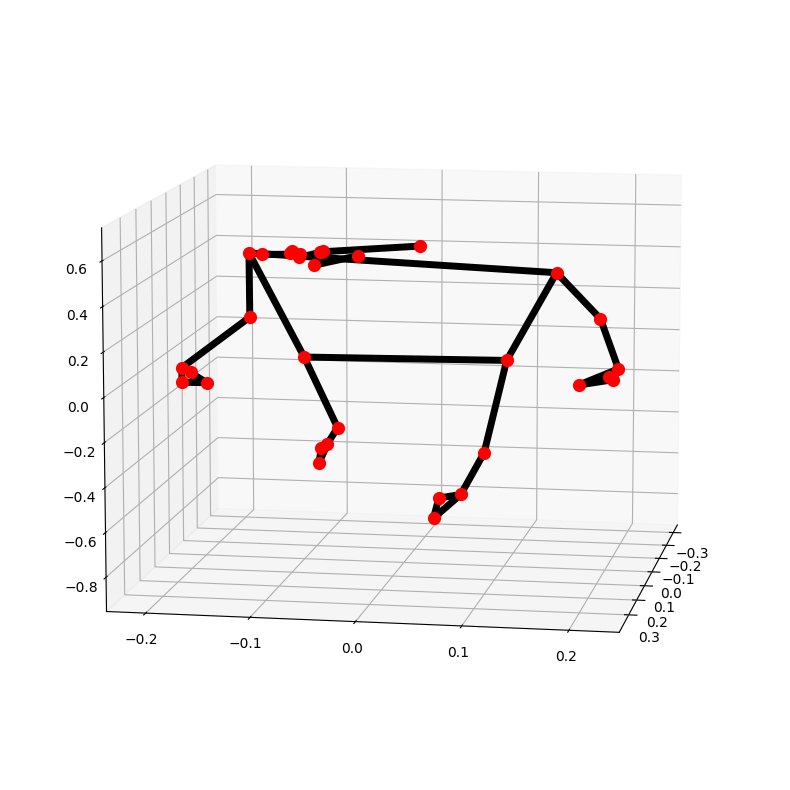

In [ ]:
img = cv.imread('/content/drive/MyDrive/final_straight.jpg')
detectPose(img, pose, display=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def detect_keypoints(image, threshold=100):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve keypoint detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use thresholding to segment the keypoints (dots)
    _, binary = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY_INV)

    # Find contours which represent keypoints
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    keypoints = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            keypoints.append((cx, cy))

    return keypoints

In [ ]:
def draw_keypoints(image, keypoints):
    for keypoint in keypoints:
        cv2.circle(image, keypoint, 5, (0, 255, 0), thickness=-1)

In [ ]:
def draw_connections(image, keypoints, connections, threshold=0.2):
    for connection in connections:
        part_a, part_b = connection
        x1, y1, confidence1 = keypoints[part_a]
        x2, y2, confidence2 = keypoints[part_b]
        if confidence1 > threshold and confidence2 > threshold:
            cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), thickness=2)

In [ ]:
def add_labels(image):
    keypoints = detect_keypoints(image)
    draw_keypoints(image, keypoints)
    return image

In [ ]:
draw_keypoints(image, points)
draw_connections(image, points, connections)